In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

colors = [
    "#FF6F00",  # eastern canada
    "#00A2FF",  # midwest
    "#00C853",  # northeast
    "#FFD600",  # pacifc
    "#AA00FF",  # rockies
    "#D50000",  # western canada
]

In [157]:
region_map = {
    'Colorado': 'Rockies',
	'British Columbia': 'Western Canada',
	'California': 'Pacific',
	'Montana': 'Rockies',
	'Idaho': 'Rockies',
	'Utah': 'Rockies',
	'Vermont': 'Northeast',
	'Washington': 'Pacific',
	'Oregon': 'Pacific',
	'Wyoming': 'Rockies',
	'New York': 'Northeast',
	'Maine': 'Northeast',
	'Alberta': 'Western Canada',
	'New Mexico': 'Rockies',
	'New Hampshire': 'Northeast',
	'Quebec': 'Eastern Canada',
	'Alaska': 'Pacific',
	'Michigan': 'Midwest',
	'Nevada': 'Pacific',
	'Arizona': 'Rockies',
	'Minnesota': 'Midwest',
	'South Dakota': 'Midwest',
	'Newfoundland and Labrador': 'Eastern Canada',
	'Pennsylvania': 'Northeast',
	'Wisconsin': 'Midwest',
    'Ontario': 'Eastern Canada',
    'West Virginia': 'Northeast',
    'Illinois': 'Midwest',
}
ski_areas['region'] = ski_areas['state'].map(region_map)

## Cleaned Stats

In [318]:
# raw_data = pd.read_clipboard()
# raw_data.to_csv('data/ski-stats.csv')

In [320]:
data = pd.read_csv('data/ski-stats.csv')

In [321]:
def convert_to_int(x):
    x = x.fillna(-1).astype(str).str.replace(',','').astype(float).astype(int)
    x.loc[x == -1] = np.nan
    return x

numeric_fields = [
    'base_elevation',
	'base_public_lift_elevation',
	'peak_public_lift_elevation',
	'peak_elevation',
	'max_lift_served_run_vert',
	'advertised_acres',
	'skiable_acres',
	'public_skiable_acres',
	'public_lift_served_skiable_acres',
	'public_boundary_area',
]

In [322]:
data = data.dropna(subset=['base_elevation'])
for f in numeric_fields:
    data[f] = convert_to_int(data[f])

data['region'] = data['state'].map(region_map)
data['vertical_drop'] = data['peak_elevation'] - data['base_elevation']

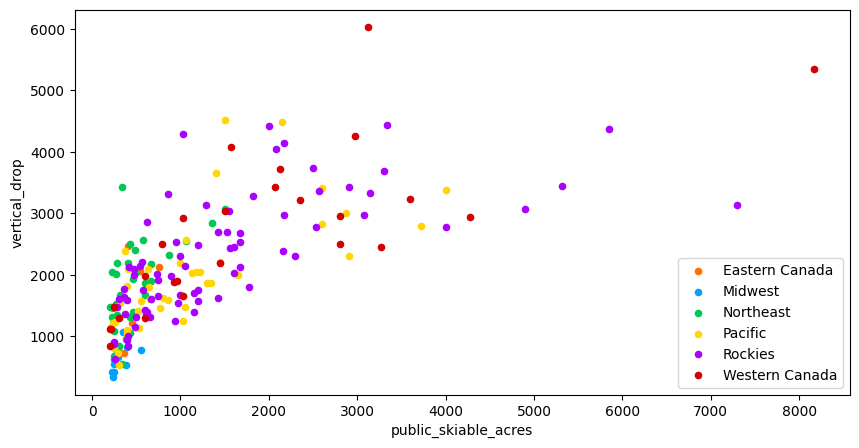

In [323]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_skiable_acres', y='vertical_drop', label=region, ax=ax, c=color)

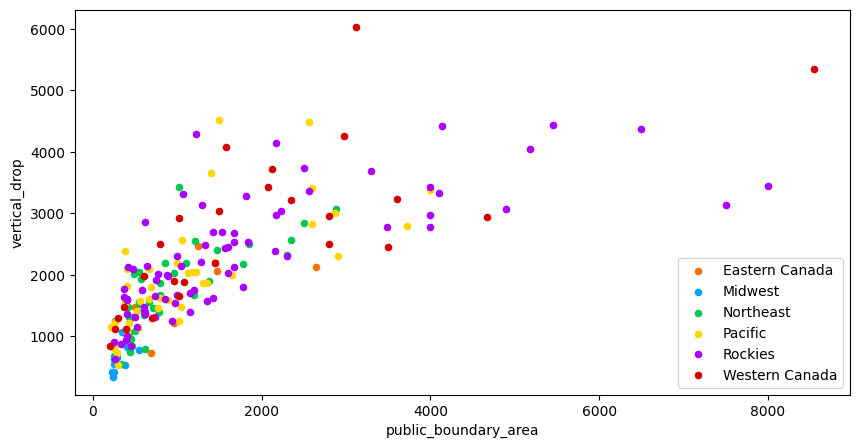

In [324]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_boundary_area', y='vertical_drop', label=region, ax=ax, c=color)

In [325]:
data['advert_to_boundary']  = data['advertised_acres']/data['public_boundary_area']

Text(0, 0.5, 'Advertised Skiable Acres / \n boundary-to-boundary area')

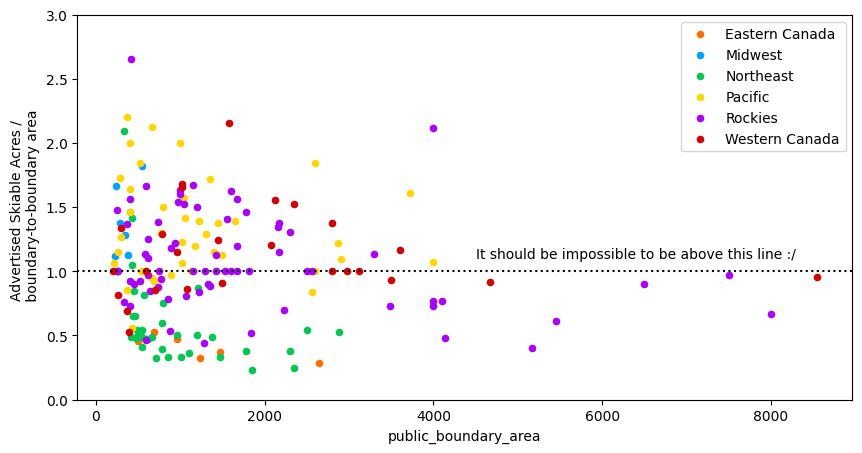

In [326]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_boundary_area', y='advert_to_boundary', label=region, ax=ax, c=color)
ax.axhline(1.0, color='k', linestyle=':')
ax.set_ylim(0,3);
ax.text(4500, 1.1,"It should be impossible to be above this line :/")
ax.set_ylabel("Advertised Skiable Acres / \n boundary-to-boundary area")

In [281]:
comp = pd.Series({
    3: .02,
    9: .16,
    15: 0.30,
    21: 0.24,
    27: 0.20,
    33: .08,
})

In [294]:
np.sum((1.0 / np.cos(comp.index * np.pi / 180.0)) * comp.values)

np.float64(1.0695338305956985)

In [301]:
1.0 / np.cos(comp.index / 180.0 * np.pi)

Index([ 1.001372345997921, 1.0124651257880029,  1.035276180410083,
        1.071144993637029, 1.1223262376343608, 1.1923632928359473],
      dtype='float64')

In [308]:
1.0 / np.cos(30.0 * np.pi / 180.0)

np.float64(1.1547005383792515)

In [305]:
# 8094

7872 * 1.07

8423.04

In [309]:
tmp = pd.read_pickle('/Users/munier/Documents/data/ski-trails/data/trails.pkl')

In [312]:
tmp['slope_area'].sum()

np.float64(5332.299999999999)